# هنا تم التنبؤ وفقا لكل طريقة تجميع

In [1]:
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_style("whitegrid")



# وصف البيانات الغير مرئية بواسطة تقنيات التجميع

## 1. BC_valid_DBSCAN

In [2]:
BC_valid_DBSCAN=pd.read_excel('Dabscan.xlsx')

In [3]:
BC_valid_DBSCAN

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS_DBSCAN
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,-1
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,-1
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,-1
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,-1
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,-1
2431,1,47,Sabha,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,-1
2432,1,43,Sabha,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,-1
2433,1,60,Sabha,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,-1


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC_valid_DBSCAN.columns.tolist()
for column in cols:
    if BC_valid_DBSCAN[column].dtype == 'object':
        BC_valid_DBSCAN[column] = le.fit_transform(BC_valid_DBSCAN[column])

In [5]:
X=BC_valid_DBSCAN.drop(["CLASS_DBSCAN"],axis=1)
y=BC_valid_DBSCAN["CLASS_DBSCAN"]  


In [6]:
BC_valid_DBSCAN['CLASS_DBSCAN'].unique()

array([-1], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

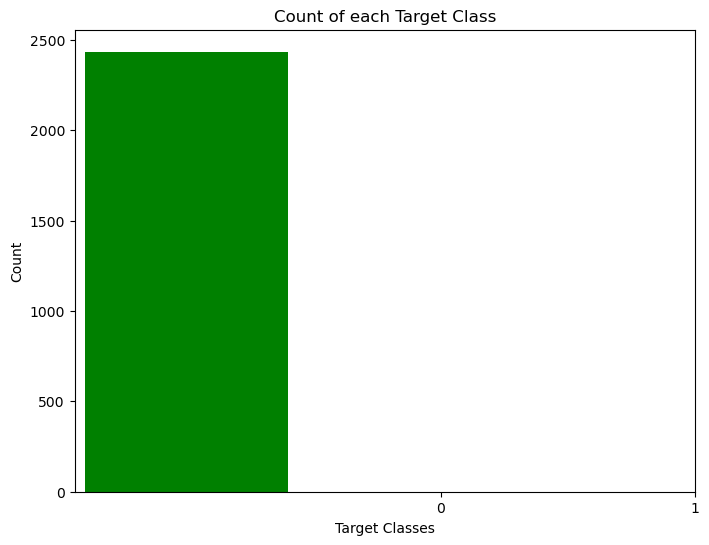

In [7]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6
plt.bar(BC_valid_DBSCAN['CLASS_DBSCAN'].unique(), BC_valid_DBSCAN['CLASS_DBSCAN'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')


In [8]:
BC_valid_DBSCAN.CLASS_DBSCAN.value_counts()

-1    2435
Name: CLASS_DBSCAN, dtype: int64

In [9]:
#3 DBSCAN (Density-Based Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2, min_samples=6)
dbs_pred = dbs.fit_predict(X)
dbs_pred

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

## 2.BC_valid_Gaussian

In [10]:
BC_change_Gaussian=pd.read_excel('Gaussian Mixture.xlsx')

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC_change_Gaussian.columns.tolist()
for column in cols:
    if BC_change_Gaussian[column].dtype == 'object':
        BC_change_Gaussian[column] = le.fit_transform(BC_change_Gaussian[column])

In [12]:

X=BC_change_Gaussian.drop(["CLASS_Gaussian"],axis=1)
y=BC_change_Gaussian["CLASS_Gaussian"]  


In [13]:
BC_change_Gaussian['CLASS_Gaussian'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

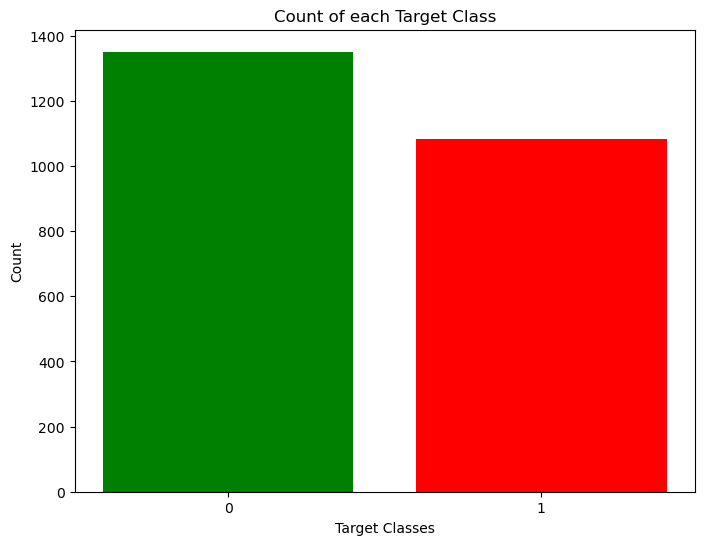

In [14]:
rcParams['figure.figsize'] = 8,6
plt.bar(BC_change_Gaussian['CLASS_Gaussian'].unique(), BC_change_Gaussian['CLASS_Gaussian'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')


In [15]:
BC_change_Gaussian.CLASS_Gaussian.value_counts()

0    1351
1    1084
Name: CLASS_Gaussian, dtype: int64

In [16]:
BC_change_Gaussian

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS_Gaussian
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


In [17]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, covariance_type="full")
gm_pred = gm.fit_predict(X)

gm_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## 3.BC_valid_Hierarchical

In [18]:
## Method 2

In [19]:
BC_change_Hierarchical=pd.read_excel('Hierarchical.xlsx')


In [20]:
BC_change_Hierarchical

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS_Hierarchical
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,1
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,1
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,1
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,1
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,1
2431,1,47,Sabha,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,1
2432,1,43,Sabha,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,1
2433,1,60,Sabha,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,1


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC_change_Hierarchical.columns.tolist()
for column in cols:
    if BC_change_Hierarchical[column].dtype == 'object':
        BC_change_Hierarchical[column] = le.fit_transform(BC_change_Hierarchical[column])

In [22]:
X=BC_change_Hierarchical.drop(["CLASS_Hierarchical"],axis=1)
y=BC_change_Hierarchical["CLASS_Hierarchical"]  


In [23]:
BC_change_Hierarchical['CLASS_Hierarchical'].unique()

array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

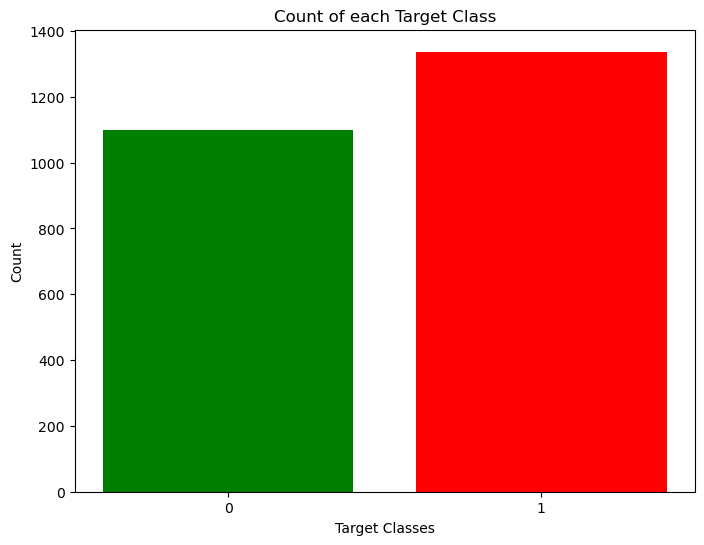

In [24]:
rcParams['figure.figsize'] = 8,6
plt.bar(BC_change_Hierarchical['CLASS_Hierarchical'].unique(), BC_change_Hierarchical['CLASS_Hierarchical'].value_counts(), color = ['red','green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [25]:
BC_change_Hierarchical.CLASS_Hierarchical.value_counts()

1    1337
0    1098
Name: CLASS_Hierarchical, dtype: int64

In [26]:

X=BC_change_Hierarchical.drop(["CLASS_Hierarchical"],axis=1)
y=BC_change_Hierarchical["CLASS_Hierarchical"]  


In [27]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_pred = ac.fit_predict(X)
ac_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## 3.BC_valid_KMeans

In [28]:
## Method 2

In [29]:
BC_change_KMeans=pd.read_excel('Kmeans.xlsx')

In [30]:
BC_change_KMeans

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS_Kmeans
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,1,47,Sabha,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,1,43,Sabha,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,1,60,Sabha,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC_change_KMeans.columns.tolist()
for column in cols:
    if BC_change_KMeans[column].dtype == 'object':
        BC_change_KMeans[column] = le.fit_transform(BC_change_KMeans[column])

In [33]:
BC_change_KMeans['CLASS_Kmeans'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

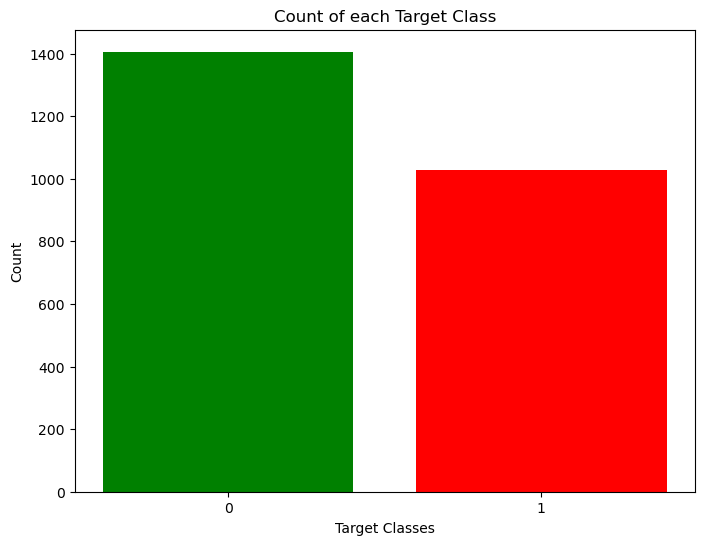

In [35]:
rcParams['figure.figsize'] = 8,6
plt.bar(BC_change_KMeans['CLASS_Kmeans'].unique(), BC_change_KMeans['CLASS_Kmeans'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [37]:
BC_change_KMeans.CLASS_Kmeans.value_counts()

0    1406
1    1029
Name: CLASS_Kmeans, dtype: int64

In [38]:

X=BC_change_KMeans.drop(["CLASS_Kmeans"],axis=1)
y=BC_change_KMeans["CLASS_Kmeans"]  


In [39]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(X)
km_pred

array([1, 1, 1, ..., 1, 1, 1])

## 4.BC_valid_MeanShift

In [40]:
## Method 2

In [41]:
BC_change_MeanShift=pd.read_excel('MeanShift.xlsx')


In [42]:
BC_change_MeanShift

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS_MeanShift
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,1,47,Sabha,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,1,43,Sabha,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,1,60,Sabha,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC_change_MeanShift.columns.tolist()
for column in cols:
    if BC_change_MeanShift[column].dtype == 'object':
        BC_change_MeanShift[column] = le.fit_transform(BC_change_MeanShift[column])

In [44]:
BC_change_MeanShift['CLASS_MeanShift'].unique()

array([0, 2, 1, 4, 3, 5], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

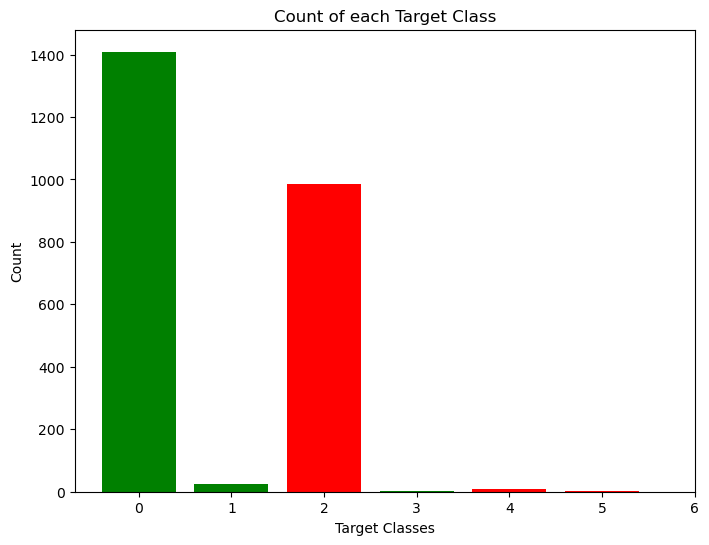

In [45]:
rcParams['figure.figsize'] = 8,6
plt.bar(BC_change_MeanShift['CLASS_MeanShift'].unique(), BC_change_MeanShift['CLASS_MeanShift'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1,2,3,4,5,6])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [46]:
BC_change_MeanShift.CLASS_MeanShift.value_counts()

0    1409
1     987
2      25
4       8
3       3
5       3
Name: CLASS_MeanShift, dtype: int64

In [47]:

X=BC_change_MeanShift.drop(["CLASS_MeanShift"],axis=1)
y=BC_change_MeanShift["CLASS_MeanShift"]  


In [48]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_pred = ms.fit_predict(X)
ms_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 5.BC_valid_Spectral

In [49]:
## Method 2

In [50]:
BC_change_Spectral=pd.read_excel('Spectral.xlsx')


In [51]:
BC_change_Spectral

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS_Spectral
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,1,47,Sabha,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,1,43,Sabha,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,1,60,Sabha,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC_change_Spectral.columns.tolist()
for column in cols:
    if BC_change_Spectral[column].dtype == 'object':
        BC_change_Spectral[column] = le.fit_transform(BC_change_Spectral[column])

In [53]:
BC_change_Spectral['CLASS_Spectral'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

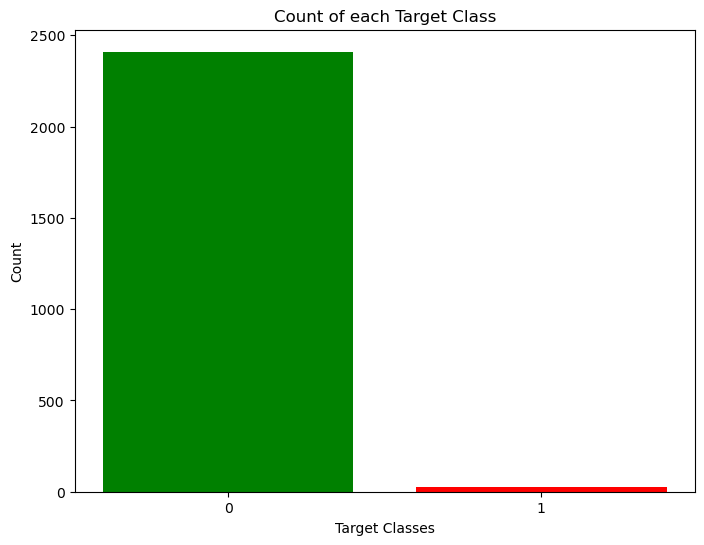

In [54]:
rcParams['figure.figsize'] = 8,6
plt.bar(BC_change_Spectral['CLASS_Spectral'].unique(), BC_change_Spectral['CLASS_Spectral'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [55]:
BC_change_Spectral.CLASS_Spectral.value_counts()

0    2410
1      25
Name: CLASS_Spectral, dtype: int64

In [56]:

X=BC_change_Spectral.drop(["CLASS_Spectral"],axis=1)
y=BC_change_Spectral["CLASS_Spectral"]  


In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2, gamma=1.0, affinity="rbf", assign_labels="discretize")
sc_pred = sc.fit_predict(X)

In [62]:
km_pred

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
ac_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
dbs_pred

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [65]:
ms_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

sc_pred